In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 3
order = 1

#初始化数据集
X = np.array([-1,0,1])  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y = np.array([-0.5,0,1]) # 目标值 + 噪音（符合高斯分布）

In [3]:
def calc_w(n,m,X,Y):
    # 采用 close form solution方法求系数 w 的值
    
    fi = np.zeros([n,m])
    i = 0
    for x in X:
        for j in range(m):
            fi[i][j] = pow(x,j)
        i = i + 1
    fi_t = fi.transpose()
    w = np.dot(np.dot(np.linalg.inv(np.dot(fi_t,fi)),fi_t),Y.transpose())  # 应用求系数的公式
    return w

In [4]:
# 采用 close form solution方法求系数 w 的值
# 线性方程为 y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
m = order + 1
w = calc_w(n,m,X,Y)
print(w)

[0.16666667 0.75      ]


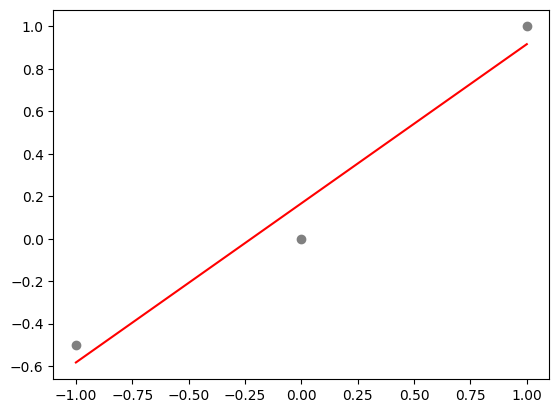

In [5]:
#绘制样例数据
plt.scatter(X,Y,color='grey')

#绘制原始曲线： y = sin(x)曲线
n1 = 500
X = np.linspace(-1,1,n1)  # 沿x轴，在0，1范围内，相同间隔生成n个数据

# #绘制拟合函数线性函数的曲线：y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
Y_2 = []
for x in X:
    y = 0
    for j in range(m):
        y += w[j]*pow(x,j)  
    Y_2.append(y) 
plt.plot(X,Y_2,color='red')